In [1]:
%tensorflow_version 1.x


TensorFlow 1.x selected.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input

import time

##Data 준비 - Sin data로 학습 진행


In [3]:
#Data 준비
def get_sin_data(start=0, end=10, step=0.1):
   x = np.arange(start, end, step)
   np.random.shuffle(x)
   y = np.sin(x)

   split_index=int(x.shape[0]*0.6)

   train_x, test_x=x[:split_index], x[split_index:]
   train_y, test_y=y[:split_index], y[split_index:]

   return (train_x, train_y), (test_x, test_y)

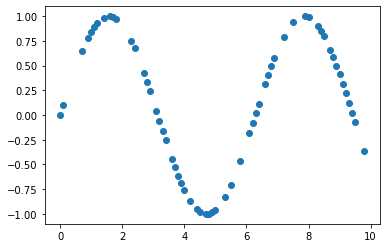

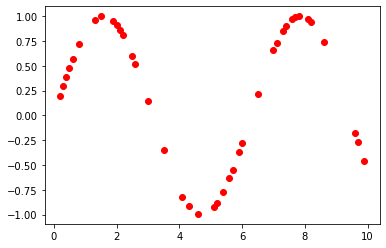

In [4]:
(train_x, train_y), (test_x, test_y)=get_sin_data(start=0, end=10, step=0.1)

plt.scatter(train_x, train_y)
plt.show()

plt.scatter(test_x, test_y, color='r')
plt.show()

##실습용 DNN 최소코드

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                20        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 5.632960319519043
40/40 [==============================] - 0s 630us/sample - loss: 0.2683 - mean_squared_error: 0.2683
loss= 0.2683470964431763
mse= 0.26834708


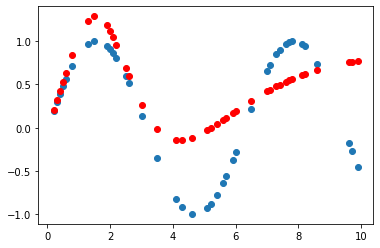

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input

import time

#모델정의
model=keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh')) 
model.add(Dense(1))

#모델 컴파일
model.compile(optimizer='SGD', loss='mse', metrics=['mse'])
model.summary()

#학습 & 시간표시
start_time=time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print('elapsed : {}'.format(time.time()-start_time))

#평가
loss,mse=model.evaluate(test_x, test_y)
print('loss=', loss)
print('mse=', mse)

#예측
y_=model.predict(test_x)

#출력
plt.scatter(test_x, test_y)
plt.scatter(test_x, y_, color='r') #예측값을 빨간색으로 출력
plt.show()

##학습 반복

반복학습을 위한 함수 정의

In [6]:
def fit_one_more(model, train_x, train_y, test_x, test_y, batch_size=20):

  start_time = time.time()
  model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=batch_size)
  print("elapsed : {}".format(time.time() - start_time))    

  y_ = model.predict(test_x)

  plt.scatter(test_x,test_y)
  plt.scatter(test_x,y_,color='r')
  plt.show()

def fit_n_times(model, train_x, train_y, test_x, test_y, n):
  
  for i in range(n):
    print("{} times fitting".format(i))
    fit_one_more(model, train_x, train_y, test_x, test_y)

반복학습 실행 (10번 반복)

0 times fitting
elapsed : 4.5429089069366455


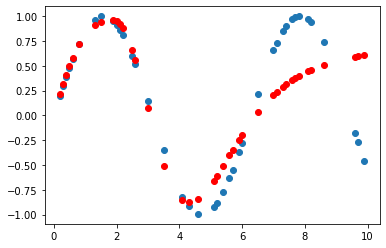

1 times fitting
elapsed : 4.421842098236084


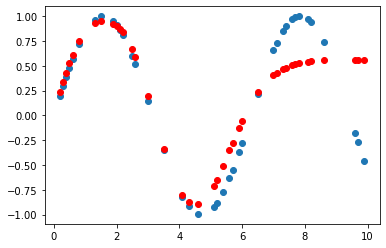

2 times fitting
elapsed : 4.387633800506592


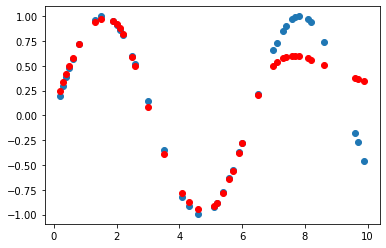

3 times fitting
elapsed : 4.594708442687988


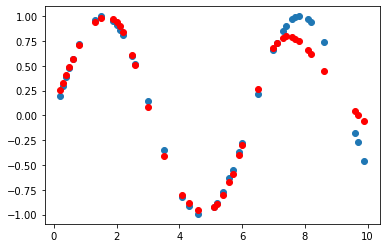

4 times fitting
elapsed : 4.5757832527160645


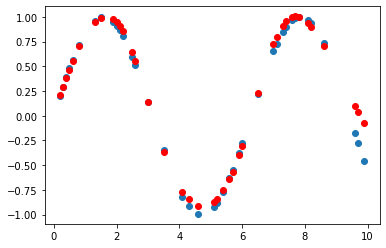

5 times fitting
elapsed : 4.520076513290405


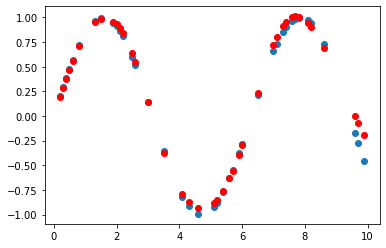

6 times fitting
elapsed : 4.637247562408447


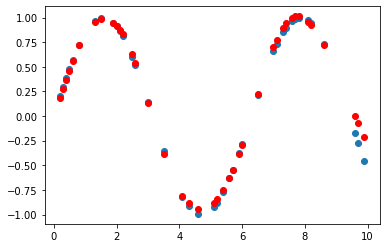

7 times fitting
elapsed : 4.569008827209473


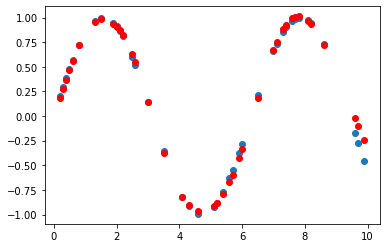

8 times fitting
elapsed : 4.5820841789245605


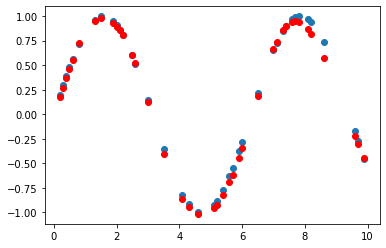

9 times fitting
elapsed : 4.752021551132202


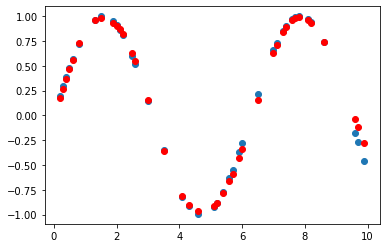

In [7]:
fit_n_times(model, train_x, train_y, test_x, test_y, 10)

##Batch size 변화

In [8]:
def build_model():

  model = keras.Sequential()
  model.add(Dense(10, activation='tanh', input_shape=(1,)))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(1))

  model.compile(optimizer="SGD", loss="mse", metrics=["mse"])

  return model

def fit_with_batch_sizes(train_x, train_y, test_x, test_y, batch_sizes):

  for batch_size in batch_sizes:
    model = build_model()
    print("batch_size={}".format(batch_size))
    fit_one_more(model, train_x, train_y, test_x, test_y, batch_size)

In [9]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

Batch size 적용 [1,2,5,10,20,50,100,200,500]

batch_size=1
elapsed : 57.486573219299316


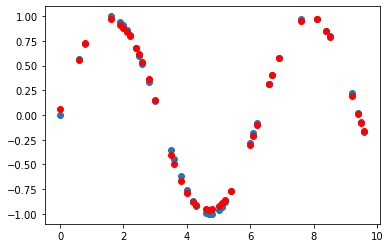

batch_size=2
elapsed : 33.039515256881714


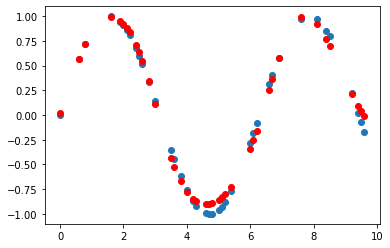

batch_size=5
elapsed : 13.731558084487915


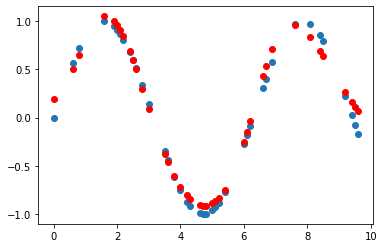

batch_size=10
elapsed : 8.528237104415894


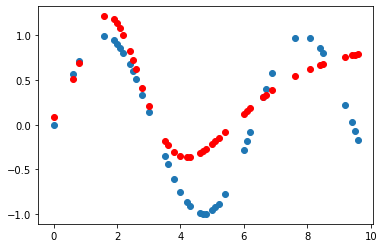

batch_size=20
elapsed : 5.973180294036865


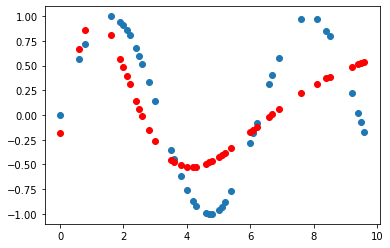

batch_size=50
elapsed : 4.272708415985107


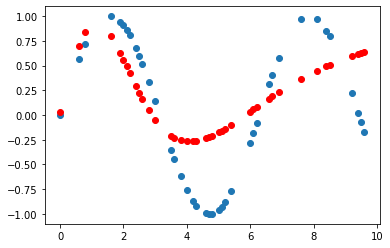

batch_size=100
elapsed : 3.0514261722564697


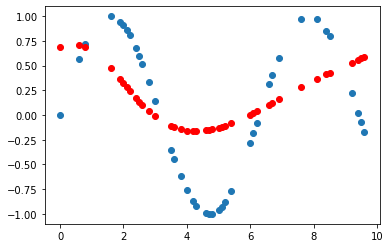

batch_size=200
elapsed : 3.147096872329712


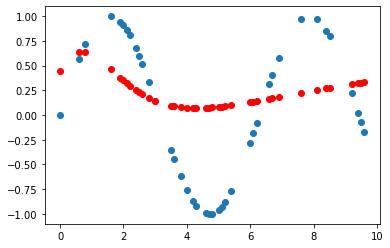

batch_size=500
elapsed : 3.377866744995117


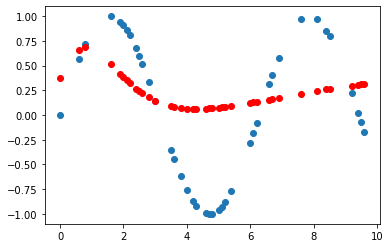

In [10]:
fit_with_batch_sizes(train_x, train_y, test_x, test_y, batch_sizes=[1,2,5,10,20,50,100,200,500])

##History의 Loss 값 추이를 통한 Overfitting 확인
반환된 history의 loss로 진행상황을 확인함

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_43 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 5.80667781829834


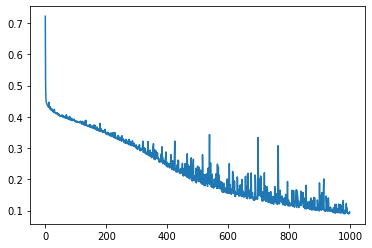

In [15]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
# model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    

plt.plot(history.history['loss'])

학습시 validation - model.fit()의 validation_data 출력

In [16]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
# history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
history = model.fit(train_x, train_y, epochs=1000, verbose=1, batch_size=20, validation_data=(test_x, test_y))
print("elapsed : {}".format(time.time() - start_time))    

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_46 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
Train on 60 samples, validate on 40 samples
Epoch 1/1000
60/60 [==============================] - 0s 7ms/sample - loss: 0.4857 - mean_squared_error: 0.4857 - val_loss: 0.4875 - val_mean_squared_error: 0.4875
Epoch 2/1000
60/60 [==============================] - 0s 271us/sample - loss: 0.4746 - mean_squared_error: 0.4746 - val_loss: 0.4790 - val_mean_squared_error: 0.4790
Epoch 3/100

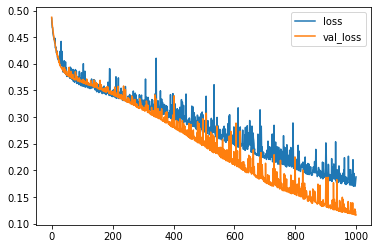

In [18]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

##model.fit()의 Validation_split 옵션
model.fit()에서 validation_split 옵션을 이용해서 test data로 준것의 일부를 validation에 사용하도록 설정  
validation에 사용된 data는 학습에 사용되지 않음

In [19]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
# history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20, validation_split=0.1)
print("elapsed : {}".format(time.time() - start_time))    

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_49 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 10.028645753860474


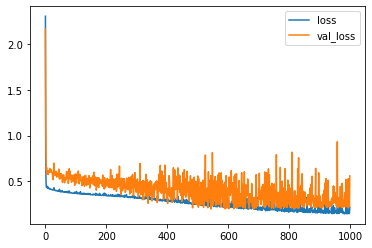

In [20]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

##Data 크기 vs epoch 수의 영향
data 크기 100배 증가  
epoch 수를 1000번에서 5번으로 감소해도 학습이 잘됨

In [21]:
# (train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.01)
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.0001)

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

start_time = time.time()
# history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
history = model.fit(train_x, train_y, epochs=5, verbose=2, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))  

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_52 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_53 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples
Epoch 1/5
60000/60000 - 4s - loss: 0.2230 - mean_squared_error: 0.2230
Epoch 2/5
60000/60000 - 4s - loss: 0.1059 - mean_squared_error: 0.1059
Epoch 3/5
60000/60000 - 4s - loss: 0.0634 - mean_squared_error: 0.0634
Epoch 4/5
60000/60000 - 5s - loss: 0.0265 - mean_squared_error: 0.0265
Epoch 5/5
60000/60000 - 4s - loss: 0.0201 - mean_squared_error: 0.0201
elapsed

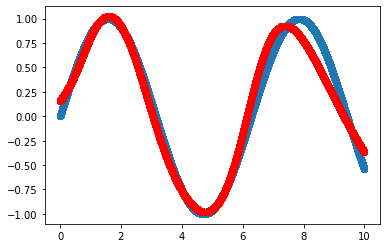

In [22]:
y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()


##Shuffle - data 편향 방지를 통한 학습 향상

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_55 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_56 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 2.9481334686279297


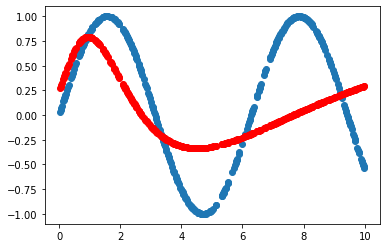

In [23]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.01)

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

start_time = time.time()
history = model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20)
#history = model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20, shuffle=True) #This should be tested
print("elapsed : {}".format(time.time() - start_time)) 

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

##Shuffled data 준비

shuffle 되지 않은 data로 학습하는 경우

600


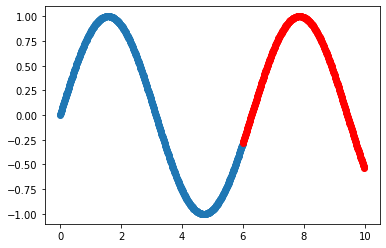

In [33]:
#DATA 준비
x = np.arange(0,10,0.01)
# np.random.shuffle(x) # COMMENTED
y = np.sin(x)

split_index = int(x.shape[0]*0.6)
print(split_index)

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y, color="r")

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_75 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_76 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_77 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 3.437591075897217


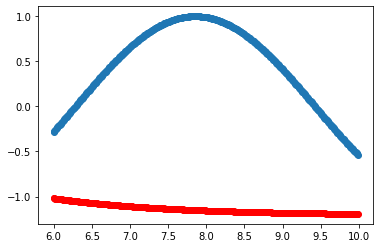

In [34]:
#학습
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

start_time = time.time()
history = model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time)) 

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

Shuffle된 data로 학습하는 경우

600


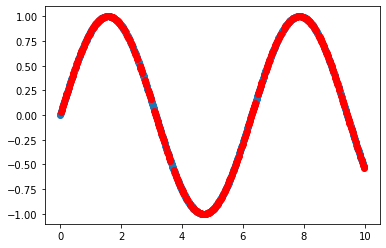

In [35]:
#DATA 준비
x = np.arange(0,10,0.01)
np.random.shuffle(x) # UNCOMMENT
y = np.sin(x)

split_index = int(x.shape[0]*0.6)
print(split_index)

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y, color="r")

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_81 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_82 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_83 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 3.559174060821533


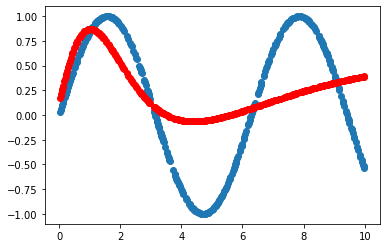

In [37]:
#학습
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

start_time = time.time()
history = model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time)) 

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

#dnn_in_keras.ipynb 파일의 Normalization/standardization 